# 1. Web开发前置知识

---

### 1.1. 服务器相关概念

#### 1. 软件概念的服务器和硬件概念的服务器

软件层面: 比如学习数据库的时候，电脑装了MySQL服务端，那么此时你的电脑就是一个MySQL服务器。然后你又装了SVN服务端，那么此时你的电脑既是MySQL服务器，又是SVN服务器, Tomcat服务器同理。

硬件层面： 服务器本质上也是一台电脑，就一大铁箱。

#### 2. Web Server and Web Container

Tomcat = Web server + Servlet/JSP container（Web container）。

As above formula showen, Tomcat has two major tasks. First taks is as a web server(http server), to handle http request from client. The second is as a web container, to convert jsp files(dynamic resources) to html files(static resources).

> Apache Tomcat, one of the most popular `web server` and `servlet container` for Java code.

### 1.2. What is MVC?

Model–View–Controller (usually known as MVC) is a software design pattern commonly used for developing user interfaces that divide the related program logic into three interconnected elements.
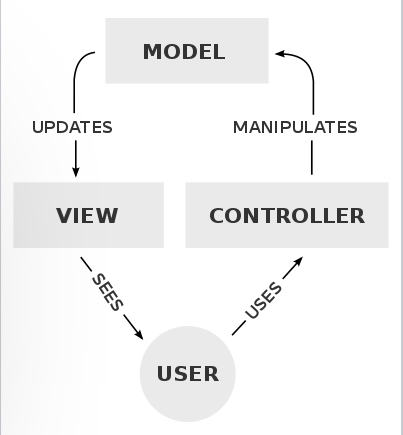

+ The model is responsible for managing the data of the application. It receives user input from the controller.


+ The view renders presentation of the model in a particular format.


+ The controller responds to the user input and performs interactions on the data model objects. The controller receives the input, optionally validates it and then passes the input to the model.

### 1.3. Static Page and Dynamic Page

---

> A static web page is a web page that is delivered(得嘞我r d) to the user's web browser exactly as stored, in contrast to dynamic web pages which are generated(尖讷瑞 忒的) by a web application.

> A dynamic website(**database-driven** site) contains information and content that changes, depending on factors such as the viewer of the site. When the information is updated or changed within the database, it changes on the site.

因此一个由js实现的倒计时的页面,也不算是动态的.

# 2. JSP and Servlet

--- 

解释JSP, 还需要先带入一下背景. 这两天在使用c写一个http server给一些物联网的设备用以方便传递数据, 处理http request非常的麻烦,需要处理来自socket的raw string, 解析每一个 slash /符号,以便分出 endpoint和path以及parameters,甚至是GET还是POST请求还需要用c的函数去判断截取看看char数组是不是相同,真的太麻烦了. 在写Java的时候遇到了Servlet, 简直不要太方便, Servlet继承一个类, 已经解析所有request, 只需要调用getParameter函数就能获得对应的键值. 

```java
String username = request.getParameter("username");
String password = request.getParameter("password");
```

显然Servlet解决了how to handle http request. 但是当我想用c去返回数据的时候,纯数据还好,返回一个数包装成json串encode下一发送过去就行. 但是想返回一个网页呢?我需要一点一点的拼接, 就是从`<html> </html>`标签开始拼,拼接后再把这么多字符串返回给client. 对于固定已知的请求还好说,虽然麻烦点,但我可以提前写好然后把形成的数据插入到对应的char数组的位置就行了. 但是数据不固定呢, 当数据可能是1位数,也可能是11位的手机号,这个时候我怎么插入到数组中间再返回给client? 巨麻烦! 我这种思路就是在程序里把固定的html语句写好然后和动态的数据拼接, 最后一起返回给client. 但是这样拼接太麻烦了,有没有办法把动态的数据直接插入到写好的html呢. 这么听着貌似是一个意思?

> Jakarta Server Pages, JSP. 我们可以直接在JSP文件里写HTML代码，使用上把它当做HTML文件。而且JSP中HTML/CSS/JS等的写法和HTML文件中的写法是一样的。当有人请求JSP时，服务器内部会经历一次动态资源（JSP）到静态资源（HTML）的转化，服务器会自动帮我们把JSP中的HTML片段和数据拼接成静态资源响应给浏览器。也就是说**JSP运行在服务器端**，最终发给客户端的都已经是转换好的HTML静态页面（在响应体里）。**服务器并没有把JSP文件发给浏览器**。 JSP = HTML + Java片段

综上我想说的是,Servlet是老大,在servlet里有`doGET()`, `doPost()` 方法, 我们重载即可. Servlet负责handle request和respond client. 而JSP(dynamic page)只是供Servlet respond client的时候, 更方便的产生html文件(static page)的工具. 

```java
public class LoginServlet extends HttpServlet {
    public void doPost(HttpServletRequest request, HttpServletResponse response){
        //注意这里的传入的参数是input标签的name属性的值而不是标签的id
        String username = request.getParameter("username");
        String password = request.getParameter("password");
        ...
    }
}
```

原本，我们需要把HTML代码一行行复制到Servlet中，然后和数据库要返回的动态数据拼接，最后向客户端响应拼接好的HTML页面。后来有了JSP，就可以不用一行行复制HTML代码了，而是在JSP中直接写HTML代码和Java代码，后期JSP编译成一个Servlet，通过Java代码获取后台数据后拼接到HTML片段中，最终通过Servlet返回给client。所以呢都是拼接,只不过前者是我们自己手动拼接,后者呢是电脑帮我们(Servlet)把脏活累活给干了.


> Jakarta Server Pages, JSP. It is used to create **dynamic web content**. In this JSP tags are used to insert JAVA code into HTML pages. JSPs are translated into servlets **at runtime**. Servlet is faster than JSP, because the first step in JSP lifecycle is the translation of JSP to java code and then compile. 


https://www.zhihu.com/question/23984162/answer/689106407

# 3. JSP的形成过程
---

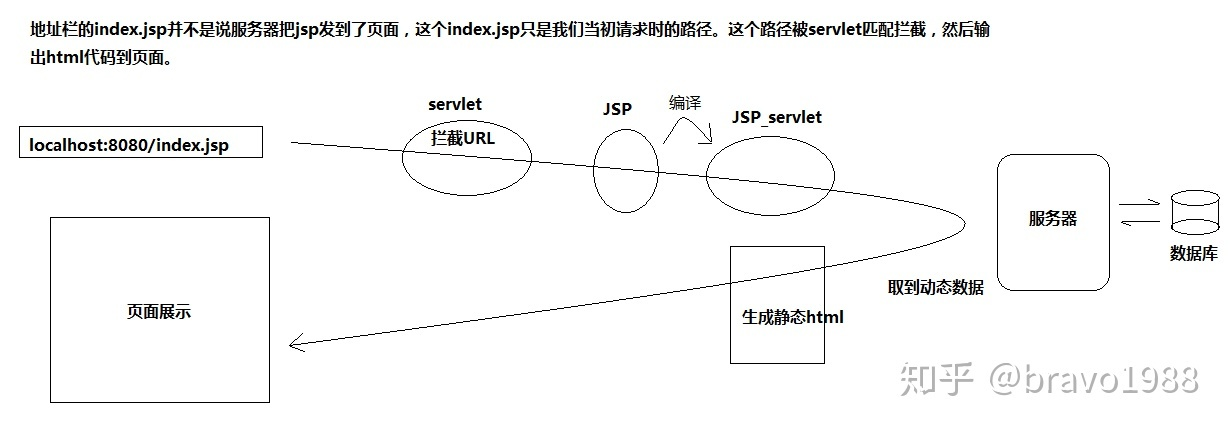

# 5. JSP Expression Language (EL)

---

Java EE is a collection of specifications for developing and deploying enterprise applications. The specifications (defined by Sun) describe services, application programming interfaces (APIs), and protocols. The 13 core technologies that make up Java EE are: `JDBC`, JNDI, EJBs, RMI, `JSP`, `Java servlets`, `XML`, JMS, Java IDL , JTS, JTA, JavaMail, JAF. 这些API和协议标准的集合就是Java EE, Tomcat呢实现了其中的两个即 JSP 和 Servlet. 所以Tomcat又叫轻量级服务器. JDBC我们也熟悉, 倒入JDBC的jar包之后, 创建一个`DatabaseConnection.java`servlet就可以被其他servlet调用进行连接数据库进行查询数据执行SQL语句了. 为什么没有倒导入JSP包呢?因为Tomcat实现了,安装了Tomcat就都在其源码里了, Tomcat是个很重要的东西, 会单独分一章进行讨论. 

##### jsp相对html的动态在代码中是怎么体现的呢? -- Expression Language




# 6. JSP, AJAX+HTML
---
其实请求、响应这么一来一回，无非要的就两样东西：**数据+HTML骨架**。

1. 卖家组装好商品后再发货,只能发成品,不可用户自行组装（JSP）

2. 卖家先发货，如果需要更新什么零件可以单独发送零件, 零件到之后由用户端自己组装（AJAX+HTML）

JSP是服务器端的，它的局限性在于数据必须在返回给客户端之前就“装载”完毕。不然HTML都已经发出去了，你就没办法跑到浏览器里把数据给它安上。